In [141]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import cross_validation, preprocessing, linear_model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from pandas.compat import StringIO
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
sklearn.__version__

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

In [205]:
df_train = pd.read_csv('titanictrain.csv')
df_test = pd.read_csv('titanictest.csv')
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


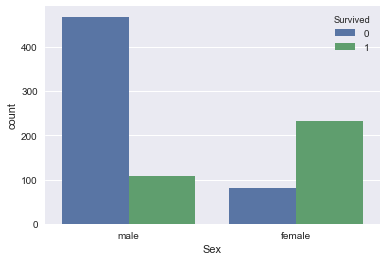

In [253]:
#色々視覚化
sns.countplot('Sex',hue='Survived',data=df_train)

In [206]:
#各列欠損値があるか確認
print(df_train.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [207]:
#各列欠損値がいくつあるのか確認
print('▼欠損値の数')
print(df_train.isnull().sum())

print('▼欠損値でない要素の個数をカウント')
print(df_train.count())


print('▼要素のカウント')
print(df_train['Sex'].value_counts())
print(df_train['Embarked'].value_counts())

▼欠損値の数
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
▼欠損値でない要素の個数をカウント
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
▼要素のカウント
male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [208]:
#欠損値含まれる行を全部消す
df_train_dropna = df_train.dropna(how = 'all' )
df_train_dropna['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [212]:
#欠損値に平均値を置換する
print(np.mean(df_train['Age']))
print(np.mean(df_test['Fare']))

29.69911764705882
35.6271884892086


In [263]:
#列ごとに異なる値で置換する
df_train = df_train.fillna({'Age' : 29.699,'Embarked':'S'})
df_test =df_test.fillna({'Age':29.699,'Embarked':'S', 'Fare':35.627})

In [269]:
#nullがないか最終確認
print('df_train')
print(df_train.isnull().sum())

print('df_test')
print(df_test.isnull().sum())

df_train
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
df_test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [272]:
#カテゴリ変数の変換
df_train['Sex'] = df_train['Sex'] .apply(lambda x:1 if x == 'male' else 0)
df_train['Embarked'] = df_train['Embarked'].map({'S' :0, 'C':1 , 'Q':2}).astype(int)
df_train = df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
train_X = df.drop('Survived' , axis = 1)
train_y = df.Survived
#データの分割
(train_X , test_X , train_y , test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 0)

#ダミー変数に変換する
#df_train_temp = df_train1.reset_index(drop=True)    # 後からインデックスでマージするので、念のため初期化しておく
#df_test_temp = df_test1.reset_index(drop = True)

#df_train_dummy = pd.get_dummies(df_train1[['Sex','Embarked']], drop_first = True)   
#df_test_dummy = pd.get_dummies(df_test1[['Sex','Embarked']],drop_first = True)
#df_train_dummy.head(5)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [216]:
#初期のものとダミー変数のデータをマージする
df_train2 = pd.merge(df_train_temp , df_train_dummy , left_index = True, right_index= True)
df_test2 = pd.merge(df_test_temp,df_test_dummy,left_index = True , right_index = True)

df_train2.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


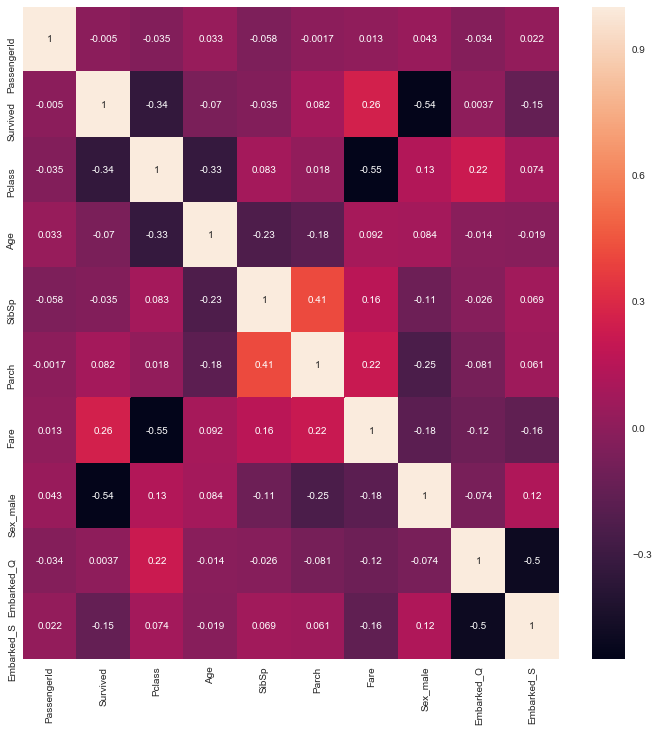

In [217]:
#各列の相関係数を求める
plt.figure(figsize = (12,12))
sns.heatmap(df_train2.corr(),annot = True)

In [218]:
#trainデータ説明変数・目的変数抽出
train_X = df_train2[['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']].values
train_y =df_train2.Survived

#testデータ
test_X = df_test2[['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']].values
#以下のテストデータはないが...
###  test_y =df_test_dummy2.Survived

In [ ]:
#ランダムフォレストのパラメーター一覧
# n_estimators:木をいくつ生成するか。デフォルトでは10。
# max_depth:木の深さの設定
# max_features:分岐に用いる説明変数の数を設定
# min_sample_split:分割する際の最小のサンプル数を設定
# random_state:seedの設定。seedを設定しないとモデルが毎回変わるので注意。

In [240]:
#ランダムフォレストの実行
clf =RandomForestClassifier(max_depth=11,random_state = 5)
clf = clf.fit(train_X , train_y)
clf_pred = clf.predict(test_X)
clf_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#正解率
###  fpr1,tpr1,threshholds1 = roc_curve(test_y , pred, pos_label=1)
### auc(fpr1,tpr1)
### accuracy_score(pred1,test_y)

In [247]:
#結果をデータフレームにする
outcome_rf_pred = pd.DataFrame(clf_pred)
outcome_rf_pred.columns = ['Survived']

In [248]:
#予測データとPassengerIdを結合
passengerid = pd.DataFrame(df_test2['PassengerId'])
outcome_rf = pd.concat([passengerid,outcome_rf_pred],axis = 1)
outcome_rf1 = outcome_rf.set_index('PassengerId')
outcome_rf1.head(5)

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [249]:
#CSVに吐き出す
outcome_rf1.to_csv('titanic_rf_0913.csv')

In [244]:
#決定木の実行
clf1 = DecisionTreeClassifier(random_state = 5)
clf1 = clf1.fit(train_X,train_y)
clf_pred1 = clf1.predict(test_X)

In [127]:
#決定木の正解率
#testデータの正解がないため...
### fpr,tpr,thresholds = roc_curve(test_y,pred,pos_label = 1)
### auc(fpr,tpr)
### accuracy_score(pred,test_y)

In [245]:
clf_pred1

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [250]:
#結果をデータフレームにする
outcome_dt_pred = pd.DataFrame(clf_pred1)
outcome_dt_pred.columns = ['Survived']

In [251]:
#予測データとPassengerIdを結合
passengerid = pd.DataFrame(df_test2['PassengerId'])
outcome_dt = pd.concat([passengerid,outcome_dt_pred],axis = 1)
outcome_dt = outcome_dt.set_index('PassengerId')
outcome_rf1.head(5)

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [252]:
#CSVに吐き出す
outcome_fix.to_csv('titanic_dt_0913.csv')